# INTRODUCTION
In this project we want to answer a few machine learning related questions. The questions are the following : 
* How do ML-algorithms perform when applied to datasets with different levels of dimensionality, and what are the best dimensionality reduction techniques for improving performance in the presence of data challenges?
* How does the choice of regularization techniques (such as L1 or L2 regularization, dropout, or early stopping) impact the extent of overfitting in various types of machine learning models?
* How does the choice of model complexity, such as the number of features, hidden layers, and neurons in a neural network, influence the risk of underfitting in machine learning models, and how can model complexity be optimized to balance the trade-off between underfitting and overfitting?

To do so, we will try to fit data on 3 widely different models (for both classification and regression problems) in term of complexity, and the way each algorithm works. It is important to note that we choose to go with real-life existing datasets and also synthetic datasets.

## The algorithms 
State here the algorithms we want to use with a brief definition for each 

# How do ML-algorithms react to different levels of dimensionality ? 
In order to answer this question and since its concerns different levels of dimensionality, we need to build synthetic datasets with different number of features, and fit the chosen models on them.But first, what is synthetic data, and how is it used ? 


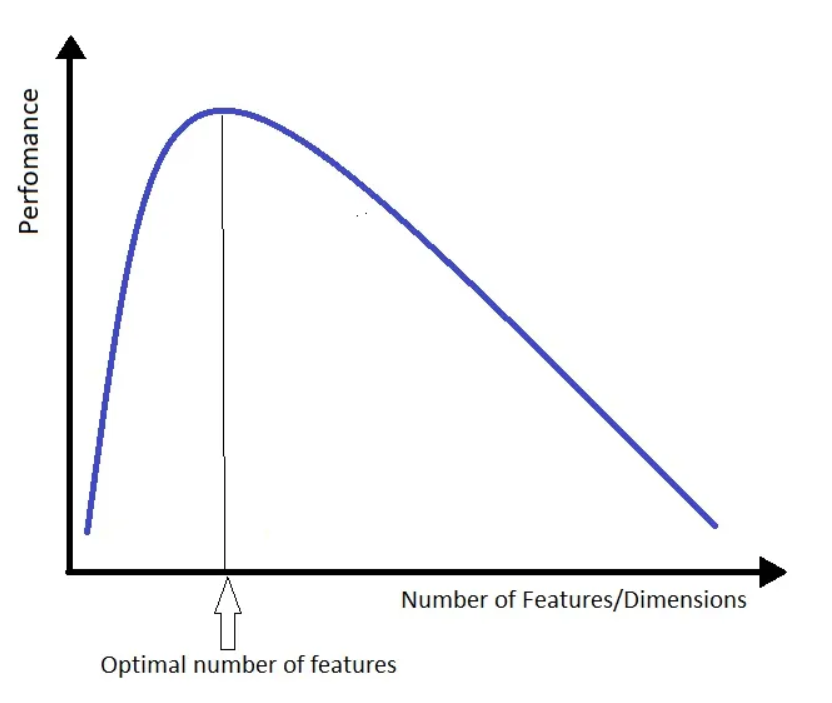

## The Time factor 
Another important impact of a large number of attributes is how it affects the model while training and testing : it takes more time. Indeed, the larger the dataset the slower these processes will be, this is another reason why we sometimes need to reduce the number of features through techniques that we'll introduce by the end of the document.

## Synthetic data
It is artificial data, that was generated based on actual data and a model that is trained to reproduce it. Its main goal is deliver the same characteristics as the original data, and be used to study the performances of machine learning models without having to work with real life data. It is becoming a respected alternative when it comes to training complex models that need big amount of data and that requires privacy constraints and data usage restrictions.

# THE IMPORTS NEEDED

In [1]:
import numpy as np
import pandas as pd 

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt
from collections import Counter
from sklearn.model_selection import train_test_split

# Evaluation of the model 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.inspection import permutation_importance



# THe model used 
from sklearn.neural_network import MLPClassifier    # NeuralNetwork
from sklearn.ensemble import RandomForestClassifier # RandomForest
from sklearn.linear_model import LogisticRegression #LinearClassification



## Creating the data 
We want to create 3 synthetic datasets of 2000 samples each, and different levels of dimensionality : 5, 10 and 25 features. The algorithms will each be fitted on these datasets. We control some parameters to make the data more realistic : 
* **flip_y** to add noise 
* **weights** to put a correct distribution between the two classes
* **random_state** to reproduce the same results at every execution
* **class_sep** to make the data separable 
* **n_informative** to give some features more importance than others, which will introduce the dimensionality reduction techniques at the end.

## Data challenges : How to overpass them ?
### The Curse of Dimensionality 
It is the idea that machine learning problems can sometimes be "cursed" by a too large of a dimension size, loosing performance overall. The number of features becomes an important parameter when training complex models, since it has an exponential relation with the number of data points needed to reach good performances. On the other hand, an excessive increase of dimensionality also leads to poor performances.


In [44]:
# Different dimensionality synthetic datasets : 
    #random_state = 100 to reproduce results
    # flip_y = 0.05 to add some noise --> challenging 
x_1,y_1 = dt.make_classification(n_samples=2000,
                                 n_features=5,
                                 n_informative = 3,
                                 weights = [0.45 , 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, class_sep = 1.2 , random_state = 100 , flip_y = 0.06)

x_2,y_2 = dt.make_classification(n_samples=2000,
                                 n_features=10,
                                 n_informative = 5,
                                 weights = [0.45, 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, 
                                class_sep = 1.2, random_state = 100 , flip_y = 0.06 )

x_3,y_3 = dt.make_classification(n_samples=2000,
                                 n_features= 30,
                                 n_informative = 15,
                                 weights = [0.45 , 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, class_sep = 1.2,random_state = 100, flip_y = 0.06 )

In [45]:
# The 3-ML Models 
nnModel_1 = MLPClassifier(solver= "adam" , random_state = 0)
nnModel_2 = MLPClassifier(solver= "adam" , random_state = 0)
nnModel_3 = MLPClassifier(solver= "adam" , random_state = 0)

rfModel_1 = RandomForestClassifier(random_state = 0)
rfModel_2 = RandomForestClassifier(random_state = 0)
rfModel_3 = RandomForestClassifier(random_state = 0)

lrModel_1 = LogisticRegression(solver ="lbfgs" , random_state =0)
lrModel_2 = LogisticRegression(solver ="lbfgs",random_state = 0)
lrModel_3 = LogisticRegression(solver ="lbfgs",random_state = 0)

In [46]:
# Splitting the data 
x_train_1 , x_test_1 , y_train_1 , y_test_1 = train_test_split(x_1 , y_1 , test_size = 0.2 , random_state = 100 )
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split(x_2 , y_2 , test_size = 0.2, random_state = 100)
x_train_3 , x_test_3 , y_train_3 , y_test_3 = train_test_split(x_3 , y_3 , test_size = 0.2, random_state = 100)

# Fitting the data to the models
for model_data in [(nnModel_1, x_train_1 , y_train_1) ,
                  (nnModel_2, x_train_2 , y_train_2),
                  (nnModel_3, x_train_3 , y_train_3),
                  
                   (lrModel_1, x_train_1 , y_train_1),
                  (lrModel_2, x_train_2 , y_train_2),
                  (lrModel_3, x_train_3 , y_train_3),
                  
                  (rfModel_1, x_train_1 , y_train_1),
                  (rfModel_2, x_train_2 , y_train_2),
                  (rfModel_3, x_train_3 , y_train_3)]: 
    model_data[0].fit(model_data[1] , model_data[2])


/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
#Predict the test sets
y_pred_nn_1 = nnModel_1.predict(x_test_1)
y_pred_nn_2 = nnModel_2.predict(x_test_2)
y_pred_nn_3 = nnModel_3.predict(x_test_3)

y_pred_lr_1 = lrModel_1.predict(x_test_1)
y_pred_lr_2 = lrModel_2.predict(x_test_2)
y_pred_lr_3 = lrModel_3.predict(x_test_3)

y_pred_rf_1 = rfModel_1.predict(x_test_1)
y_pred_rf_2 = rfModel_2.predict(x_test_2)
y_pred_rf_3 = rfModel_3.predict(x_test_3)

## Evaluation : How do we evaluate the model's performance ? 
### First impression : accuracy score 
We can star by checking the accuracy score after predicting the test data, to get a first idea of how well the model fitted. Note that this evaluation method is far from enough in these types of problems, this is why we introduce confusion matrixes. 
### Classification reports
They are visual representation in a brief summary of the results of a classification problem prediction. It gives interesting details such as the F1-score and the recall, to better evaluate a model. 

In [48]:
for elem in [(y_test_1 , y_pred_lr_1) , (y_test_1 , y_pred_nn_1),(y_test_1 , y_pred_rf_1),
            (y_test_2 , y_pred_lr_2),(y_test_2 , y_pred_nn_2),(y_test_2 , y_pred_rf_2),
            (y_test_3 , y_pred_lr_3),(y_test_3 , y_pred_nn_3),(y_test_3 , y_pred_rf_3)] : 
    print(classification_report(elem[0] , elem[1]))
    print("------------------------------------------------")



              precision    recall  f1-score   support

           0       0.98      0.95      0.96       182
           1       0.96      0.98      0.97       218

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       182
           1       0.96      0.99      0.97       218

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       182
           1       0.96      0.98      0.97       218

    accuracy                           0.96       400
   macro avg       0.97      0

### ROC Curves 

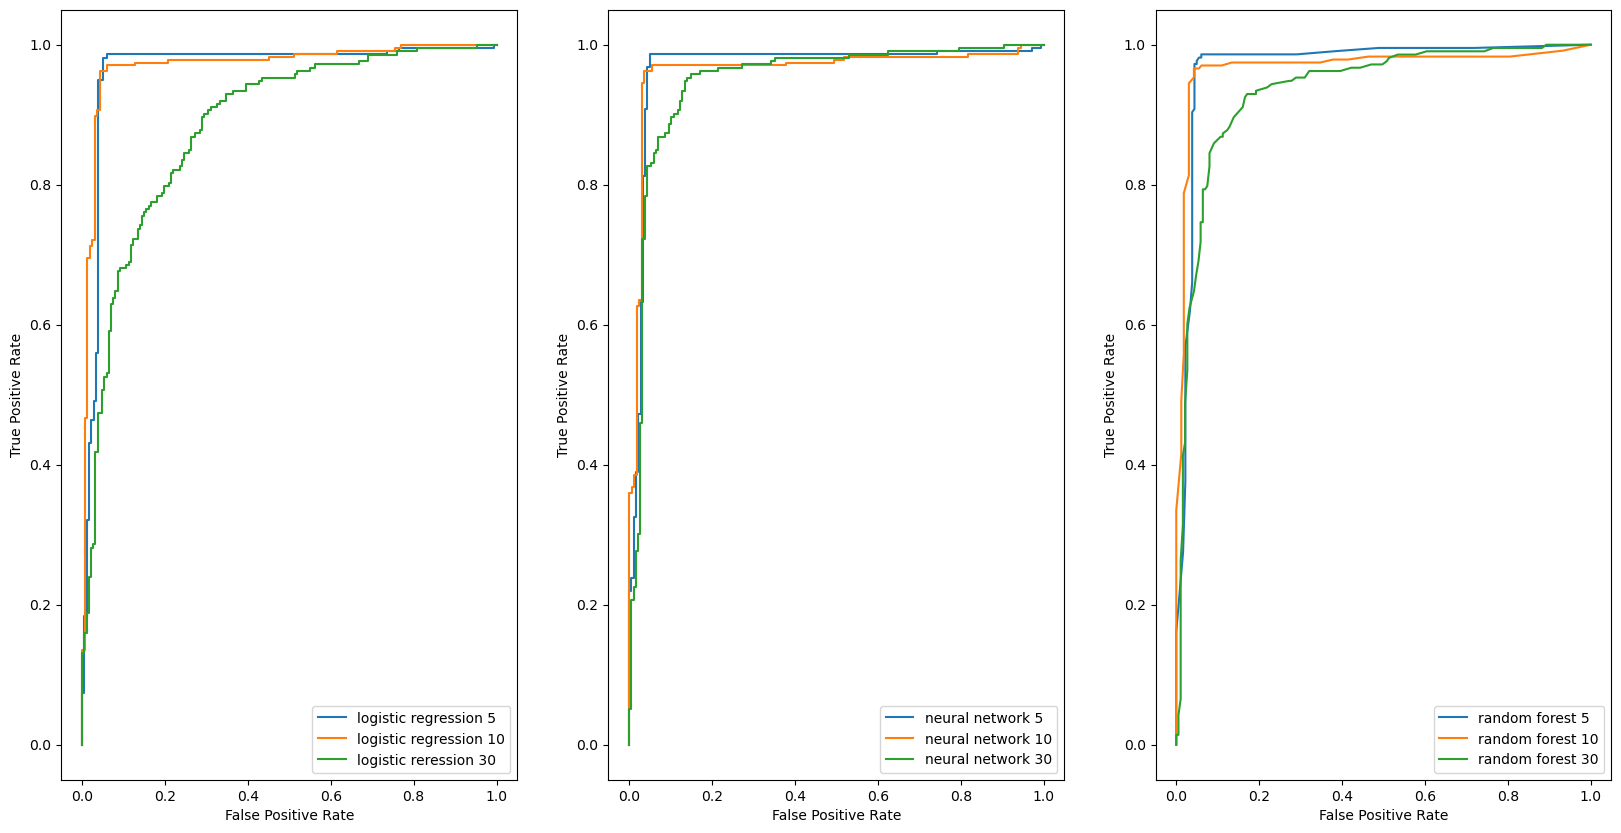

In [49]:

# predict probabilities 

#Logistic regression 
y_pred_proba_1_lr = lrModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_lr = lrModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_lr = lrModel_3.predict_proba(x_test_3)[::,1]

#neural networks  
y_pred_proba_1_nn = nnModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_nn = nnModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_nn = nnModel_3.predict_proba(x_test_3)[::,1]

#RandomForest  
y_pred_proba_1_rf = rfModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_rf = rfModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_rf = rfModel_3.predict_proba(x_test_3)[::,1]

#define metrics LR
fpr_1_lr, tpr_1_lr, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_lr)
fpr_2_lr, tpr_2_lr, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_lr)
fpr_3_lr, tpr_3_lr, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_lr)

#define metrics NN
fpr_1_nn, tpr_1_nn, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_nn)
fpr_2_nn, tpr_2_nn, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_nn)
fpr_3_nn, tpr_3_nn, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_nn)

#define metrics
fpr_1_rf, tpr_1_rf, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_rf)
fpr_2_rf, tpr_2_rf, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_rf)
fpr_3_rf, tpr_3_rf, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_rf)

#create ROC curve

fig, axs = plt.subplots(1, 3, figsize=(20, 10))  # one row of Axes, two columns = 3 plots
axs[0].plot(fpr_1_lr,tpr_1_lr , label = "logistic regression 5")
axs[0].plot(fpr_2_lr,tpr_2_lr , label = "logistic regression 10")
axs[0].plot(fpr_3_lr,tpr_3_lr , label = "logistic reression 30")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend()

axs[1].plot(fpr_1_nn,tpr_1_nn , label = "neural network 5")
axs[1].plot(fpr_2_nn,tpr_2_nn, label = "neural network 10")
axs[1].plot(fpr_3_nn,tpr_3_nn, label = "neural network 30")
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].legend()



axs[2].plot(fpr_1_rf,tpr_1_rf,label = "random forest 5")
axs[2].plot(fpr_2_rf,tpr_2_rf,label = "random forest 10")
axs[2].plot(fpr_3_rf,tpr_3_rf,label = "random forest 30")
axs[2].set_xlabel("False Positive Rate")
axs[2].set_ylabel("True Positive Rate")
axs[2].legend()


## Results and analysis  
We can see that amongst the three models proposed, the neural network classifier performs the better. Indeed, independently of the dimensionality, the model learns the quicker and gets overall the better results. 

Another important point is that the models trained on 30 features perform worse than the other ones, even if the dataset has more informative features ( 15 informative features out of 30 ). While the models trained on 5 and 10 features reach a true positive rate of 1 relatively quickly, the ones trained on 30 features take more false positives to ge there. They still perform well, according to the classification report with higher than 85% accuracy, but the performance loss is clear.

Actually, we can say that ML models are strongly affected by the **non-important** features, in a bad way. We thus want to always reduce the number of non informant features, to avoid feeding "*dimensional noise*" to the model.

When it comes to the question "how does each model react to different dimensionality levels ?", **neural networks** seem to be less affected by this problem, at least in our case since the neural network has the closest curves amongst the tree algorithms. Another interesting point to consider is how do the change of hidden layers number react to different levels of dimensionality ? Can they adapt to it and find a way to work with all the features by adding layers ? 

On the other hand, **LogisticRegression** seems to have trouble with a high number of redundant features, which makes it the most sensitive model of the three. 

## Dimensionality reduction techniques

We can now dig deeper into dimensionality reduction techniques, and askk oursleves : How can we make the 30-features model better? These techniques consist in removing features from the dataset before training the data, and thus taking th model from  high dimensional space to a lower on, and keeping the essence of the data.
They are broadly separated in two categories : 

### Feature Selection 
The feature selection method aims to find a subset of the most relevant features that have a direct impact on the target function. We will not look too deep into this category, since it is not the most important one. An easy way to select features is to check for the most important ones, an example below : 


#### Feature Importance with RandomForest
In classification problems, it is always interesting to check for the feature importances, specially in our case since we want to study the dimensionality's role in a machine learning problem. Unfortunately, not all models have a feature_importances_ attribute, but we can at least check these for the RandomForest model. 

In [50]:
feature_names_1 = [f"feature {i}" for i in range(x_train_1.shape[1])]
feature_names_2 = [f"feature {i}" for i in range(x_train_2.shape[1])]
feature_names_3 = [f"feature {i}" for i in range(x_train_3.shape[1])]

result_1 = permutation_importance(
    rfModel_1, x_test_1, y_test_1,random_state=0)
result_2 = permutation_importance(
    rfModel_2, x_test_2, y_test_2,random_state=0)
result_3 = permutation_importance(
    rfModel_3, x_test_3, y_test_3,random_state=0)

forest_importances_1 = pd.Series(result_1.importances_mean, index=feature_names_1)
forest_importances_2 = pd.Series(result_2.importances_mean, index=feature_names_2)
forest_importances_3 = pd.Series(result_3.importances_mean, index=feature_names_3)


Text(0, 0.5, 'Mean accuracy decrease')

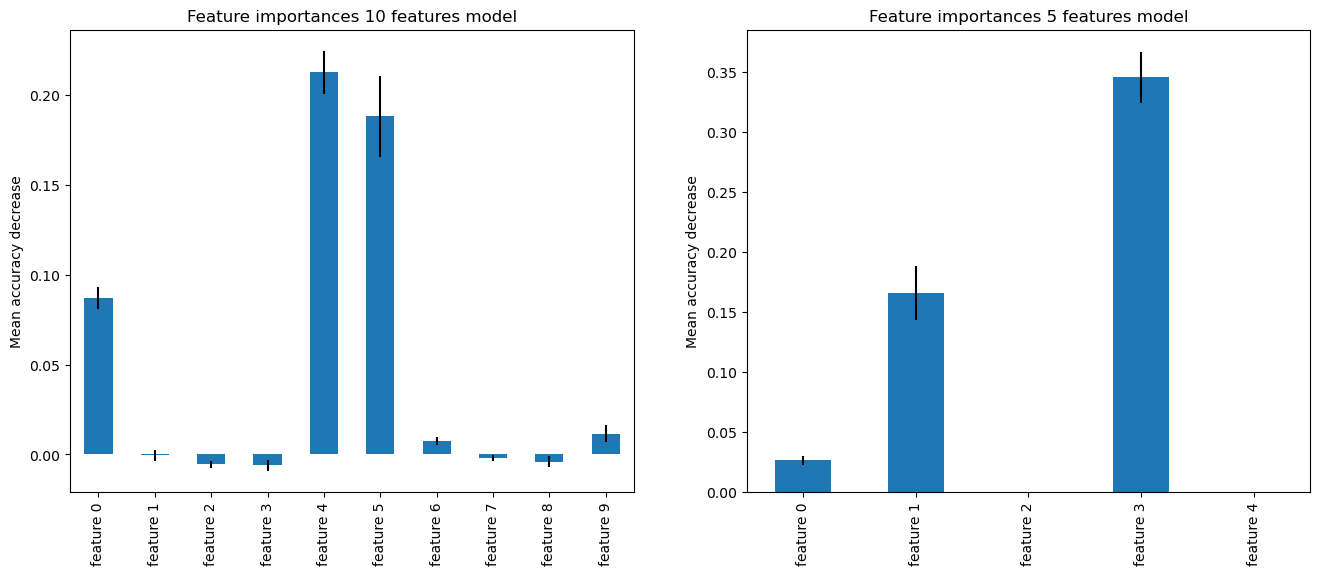

In [51]:
fig, axs = plt.subplots(1,2 , figsize=(16,6))

axs[0] = forest_importances_2.plot.bar(yerr=result_2.importances_std, ax=axs[0])
axs[0].set_title("Feature importances 10 features model")
axs[0].set_ylabel("Mean accuracy decrease")

axs[1] = forest_importances_1.plot.bar(yerr=result_1.importances_std, ax=axs[1])
axs[1].set_title("Feature importances 5 features model")
axs[1].set_ylabel("Mean accuracy decrease")


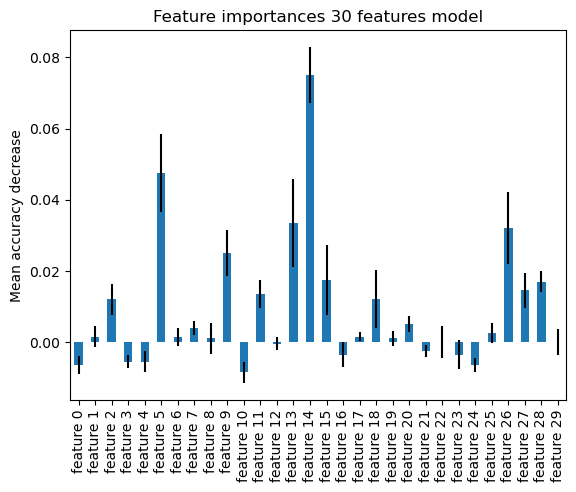

In [52]:
forest_importances_3.plot.bar(yerr= result_3.importances_std)
plt.title("Feature importances 30 features model")
plt.ylabel("Mean accuracy decrease")
plt.show()

**Analysis**: By analysing the features importances, we can clearly see that our ML models rely much more on certain features than others. Some attributes are not even represented and have 0 importance according to the Mean Accuracy Decrease metric. These features can be ignored, which would lead to a simpler dataset and will help the model predict better.

We can check the distribution of the datapoints based on the 2 most important features for each model 

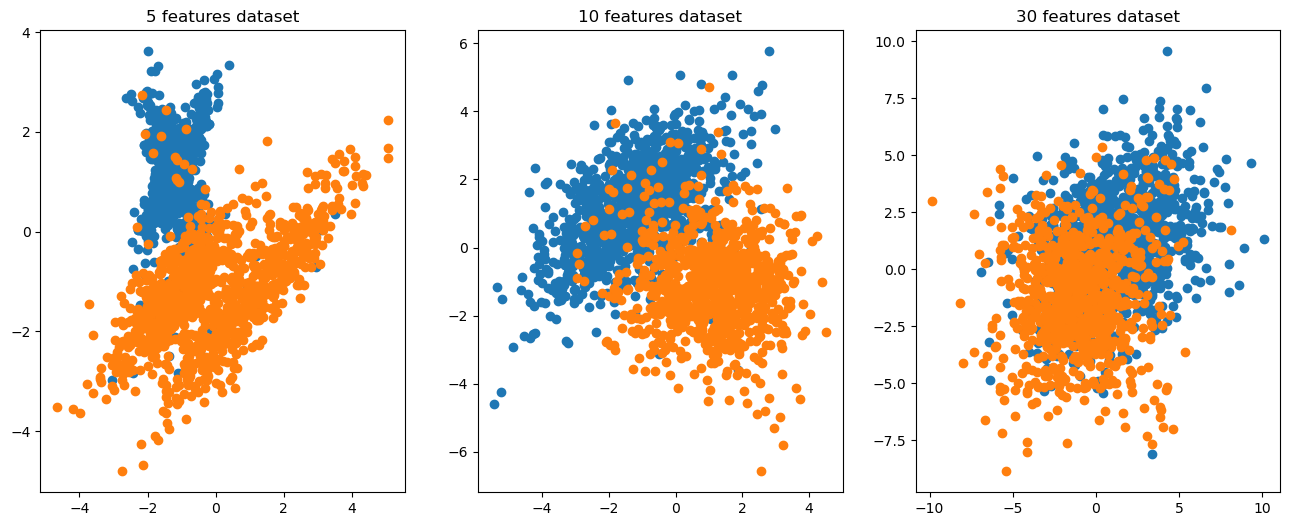

In [53]:
fig , axs = plt.subplots(1,3 , figsize=(16,6))
for label , _ in Counter(y_1).items():
    row = np.where(y_1 == label)[0]
    axs[0].scatter(x_1[row,1] , x_1[row,3], label = str(label))
    axs[0].set_title("5 features dataset")

for label , _ in Counter(y_2).items():
    row = np.where(y_2 == label)[0]
    axs[1].scatter(x_2[row,5] , x_2[row,4], label = str(label))
    axs[1].set_title("10 features dataset")

for label , _ in Counter(y_3).items():
    row = np.where(y_3 == label)[0]
    axs[2].scatter(x_3[row,5] , x_3[row,14], label = str(label))
    axs[2].set_title("30 features dataset")


Or, we can also do it with the 3 most important features, to get a 3d projection of the distribution.

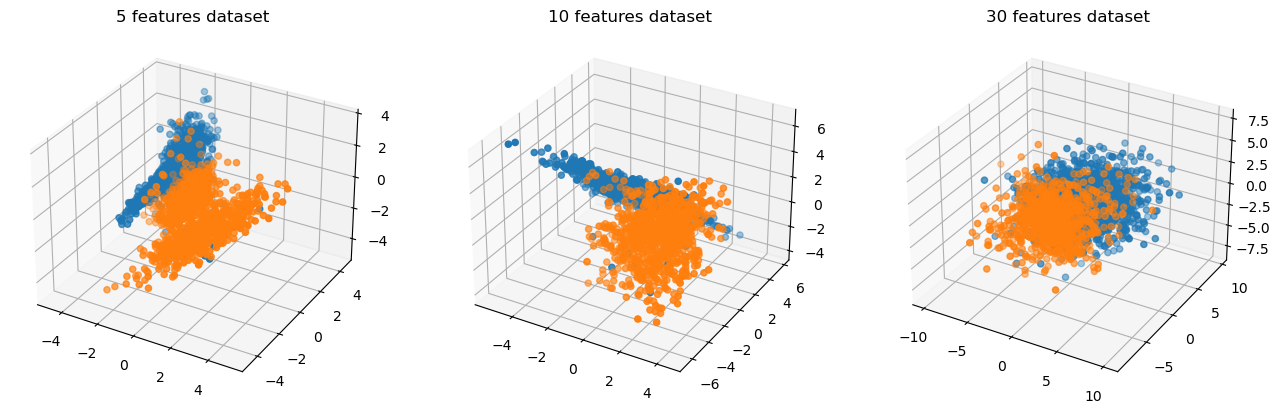

In [54]:
fig , axs = plt.subplots(1,3 , figsize=(16,6) , subplot_kw={'projection': '3d'})
for label , _ in Counter(y_1).items():
    row = np.where(y_1 == label)[0]
    axs[0].scatter(x_1[row,1] , x_1[row,0] , x_1[row,3], label = str(label))
    axs[0].set_title("5 features dataset")

for label , _ in Counter(y_2).items():
    row = np.where(y_2 == label)[0]
    axs[1].scatter(x_2[row,5] , x_2[row,4],x_2[row,0] ,label = str(label))
    axs[1].set_title("10 features dataset")

for label , _ in Counter(y_3).items():
    row = np.where(y_3 == label)[0]
    axs[2].scatter(x_3[row,5] , x_3[row,14], x_3[row,26],label = str(label))
    axs[2].set_title("30 features dataset")


**Analysis** : According to these distribution plots, we can get a clear idea about how to split between the data points, which shows that the models can predict very accurately with much less features. This is what makes the feature selection technique a very important one to deal with dimensionality.

### Feature Extraction
After talking about the feature selection method, we are now gonna dig into the feature extraction or feature projection technique. It consists in converting the data from a high dimensional space to a lower one, by combining previous features from the original dataset into new ones. Note that this transformation can be linear, but it can also have a more complex form.

Many different sub-techniques exist, but we can explain the two most popular in ML projects nowadays : 

**PCA or Principal Component Analysis** 
It is one of the leading methods of feature extraction, and of dimensionality reduction in general. It consists in a direct mapping of the data to a lower dimensional space such that the variance of the data is maximized in the new dimensionality.

Eventhough it is one of the most common techniques, it has its disadvantages : 
* PCA conversion is sensitive to the original data scales.
* Using PCA on the data loose its interpretability.

**LDA or Linear Discriminant Analysis** : LDA represents data in a way that maximizes class separability. While objects belonging to the same class are juxtaposed via projection, objects from different classes are arranged far apart. It is a generalization of Fisher's discriminant method that is common is statistics.

Overall, when it comes to dimensionality reduction, no technique is the absolute best. Each has its quirks and advantages. Thus, the best way to implement dimensionality reduction techniques is to use systematic and controlled experiments to figure out which technique(s) works with your model and which delivers the best performance on a given dataset.



## Conclusions
Very briefly , these are the points that we concluded from thi study: 
* We introduced the notion of synthetic data 

* The Curse of Dimensionality is real and needs to be dealt with. 

* Neural networks adapt easier to high dimensions and redundant features.

* LogisticRegression looses an important amount of performance when dealing with redundant features.

* We saw different way to evaluate a model fitted for a classification problem. 

* We saw different dimensionality reduction techniques, and the way they deal with data.